###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  
from seaborn import pairplot

###Carregar a base de dados
Abaixo iremos carregar a base de dados "Iris".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Obs: iremos considerar a variável de saída: **Iris-setosa**

In [ ]:
df = pd.read_csv('iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = df.iloc[:,0:4]
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y = df[4]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 4, Length: 150, dtype: object

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(Y)
Y_num=le.transform(Y)

###Tratamento dos dados
Aplique a padronização nos dados

In [ ]:
scaler = StandardScaler() 
scaler.fit(X)
X_pad = pd.DataFrame(scaler.transform(X))

###Análise exploratória
Plote um gráfico de dispersão para identificar visualmente o número de grupos. Realize esse plot para cada par de atributos, de modo a obter a melhor visualização.

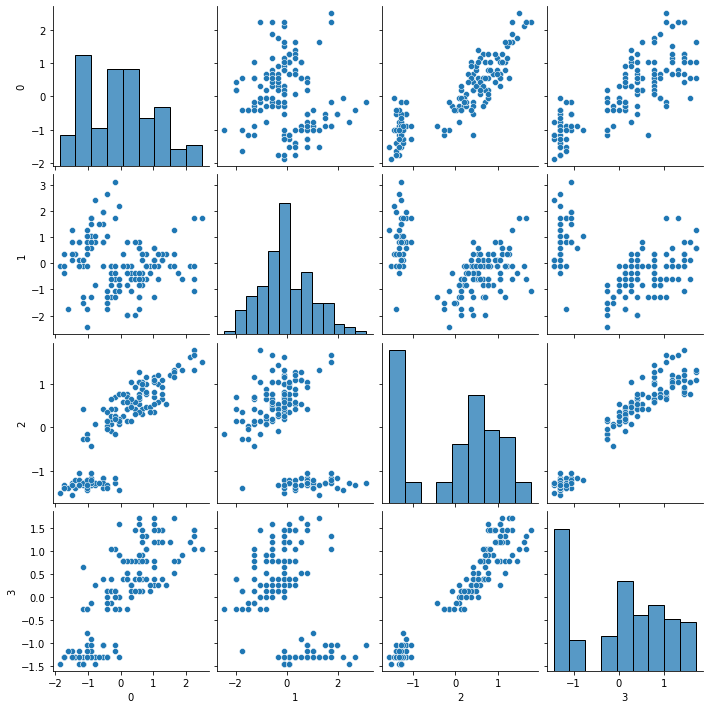

In [ ]:
'''plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.show()
plt.scatter(X.iloc[:, 0], X.iloc[:, 2])
plt.show()
plt.scatter(X.iloc[:, 0], X.iloc[:, 3])
plt.show()
plt.scatter(X.iloc[:, 1], X.iloc[:, 2])
plt.show()
plt.scatter(X.iloc[:, 1], X.iloc[:, 3])
plt.show()
plt.scatter(X.iloc[:, 2], X.iloc[:, 3])
plt.show()'''

pairplot(X_pad)

Selecione as duas melhores features de acordo com as visualizações do passo anterior

In [ ]:
# As duas melhores Fetures foram a terceira (2) e a Quarta(3)

X_pad_usado = X_pad.iloc[:,2:4]
X_pad_usado.head()

,2,3
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977


In [ ]:
X_pad_usado.describe()

,2,3
count,1.500000e+02,1.500000e+02
mean,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00
min,-1.568735e+00,-1.444450e+00
25%,-1.227541e+00,-1.181504e+00
50%,3.362659e-01,1.332259e-01
75%,7.627586e-01,7.905908e-01
max,1.786341e+00,1.710902e+00


###Método Elbow
Implemente o método elbow para encontrar o melhor número de grupos

*   Realize uma busca a partir de 2 grupos até 10
*   Utilize a inertia para avaliar a variação
*   Plote os valores da inertia em cada K

In [ ]:
def get_clustering_metric(X, k):
  model = KMeans(n_clusters=k).fit(X)
  # [ALTERE AQUI] execute o k-means e retorne o valor da inertia
  return model.inertia_

2: 54.14584701344988
3: 18.046983891906276
4: 12.307440251261843
5: 9.232741120063753
6: 7.2278875539630505
7: 6.03558185300645
8: 5.282549128016088
9: 4.4233409793335765
10: 3.9110248283787357
best k:  3


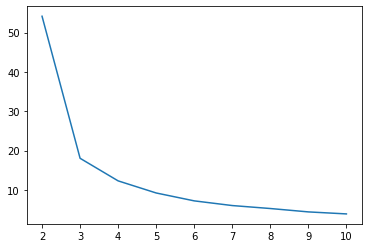

In [ ]:
# declare uma lista de possíveis valores para o k
n_clusters_candidates = list(range(2,11))

values = []

# itere sobre a lista e armazene as diferenças
for k in n_clusters_candidates:
	
	# execute o k-means e em seguida obtenha o valor para a inertia ou silhueta
  current_metric_value = get_clustering_metric(X_pad_usado, k)
  print(f'{k}: {current_metric_value}')

  values.append(current_metric_value)

min_value = np.inf
best_k = -1

for i in range(1, len(values)-1):
  val1 = values[i-1] - values[i]
  val2 = values[i] - values[i+1]
  val = val2 / val1

  if val < min_value:
      min_value = val
      best_k = n_clusters_candidates[i]

print("best k: ", best_k)

plt.plot (n_clusters_candidates, values)
plt.show() 

### Execute o K-Means

Execute o k-means com o K escolhido de forma automática da etapa anterior

In [ ]:
model = model = KMeans(n_clusters=best_k).fit(X_pad_usado)

y_predict = model.labels_

In [ ]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Avaliação do K-Means
Imprima os índices da silhueta e NMI e plote o gráfico de dispersão com a saída do k-means

Obs: para calcular o NMI será necessário um tratamento para converter o tipo textual em numérico.

In [ ]:
sil = metrics.silhouette_score(X_pad_usado, y_predict, metric='euclidean')
nmi = metrics.normalized_mutual_info_score(Y_num,y_predict)

print("Silhueta: ", sil)
print("NMI: ", nmi)

Silhueta:  0.6736179401065728
NMI:  0.8641855068202222


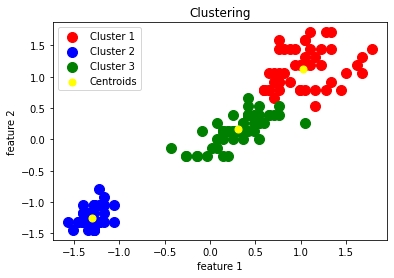

In [ ]:
# plot de como ficou a clusterização

plt.scatter(X_pad_usado.iloc[y_predict==0, 0], X_pad_usado.iloc[y_predict==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_pad_usado.iloc[y_predict==1, 0], X_pad_usado.iloc[y_predict==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_pad_usado.iloc[y_predict==2, 0], X_pad_usado.iloc[y_predict==2, 1], s=100, c='green', label ='Cluster 3')


plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(model.cluster_centers_)

,0,1
0,1.028132,1.127490
1,-1.304878,-1.255129
2,0.305646,0.166094


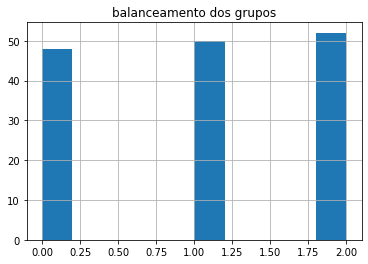

In [ ]:
pd.DataFrame(y_predict).hist()
plt.title('balanceamento dos grupos')
plt.show()